## Importing the necessary packages

In [1]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

## Importing the crop_recommendation.csv file and showing its details

In [2]:
df=pd.read_csv(r"C:\Users\PUTUL SIDDHARTH\Desktop\learn\final_dataset_april.csv")
df.head()

,N,P,K,temperature,humidity,ph,rainfall,Crop,dewPoint,precipIntensity,pressure,visibility,windBearing,windSpeed,Yield
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,29.53,0.0000,1027.13,2.46,214,1.18,35.7
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,29.77,0.0001,1026.87,2.83,166,1.01,35.7
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,29.36,0.0001,1026.88,2.95,158,1.03,35.7
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,29.47,0.0002,1026.37,2.89,153,1.84,35.7
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,29.86,0.0003,1026.19,2.97,156,1.85,35.7


In [3]:
df.shape

(2200, 15)

## Below are the factors/attributes we will be training upon

In [4]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'Crop',
       'dewPoint', 'precipIntensity', 'pressure', 'visibility', 'windBearing',
       'windSpeed', 'Yield'],
      dtype='object')

## These are the crops which will be recommended after training our model

In [5]:
df['Crop'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

## Heatmap is generally used to show correlation between different attributes of a dataset

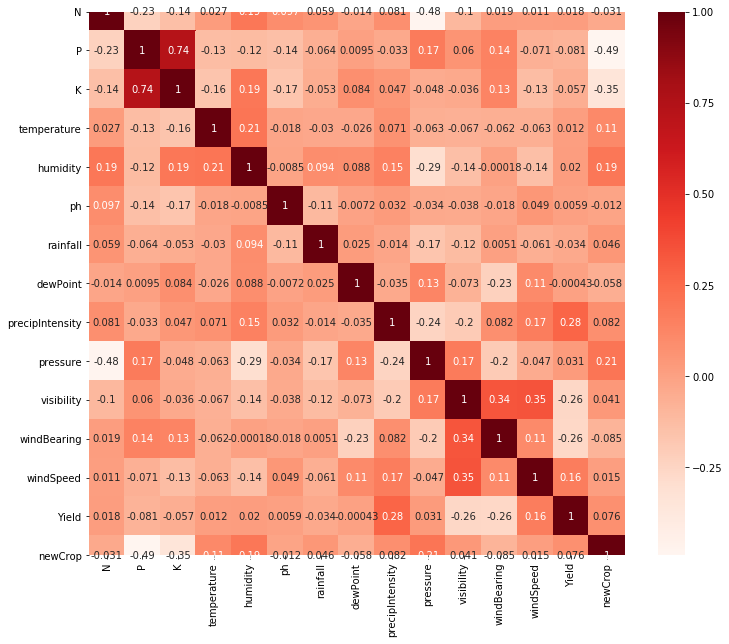

In [6]:
labelencoder = LabelEncoder()
df['newCrop'] = labelencoder.fit_transform(df['Crop'])
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

## Keeping training attributes in features variable and output attribute in target variable

In [7]:
features = df[['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']]
target = df['Crop']
labels = df['Crop']
acc = []
model = []

## Cleaning the dataset in case there are null values present in the dataset

In [8]:
df['N'].fillna(df['N'].median(), inplace = True)
df['P'].fillna(df['P'].median(), inplace = True)
df['K'].fillna(df['K'].median(), inplace = True)
df['temperature'].fillna(df['temperature'].median(), inplace = True)
df['humidity'].fillna(df['humidity'].median(), inplace = True)
df['ph'].fillna(df['ph'].median(), inplace = True)
df['rainfall'].fillna(df['rainfall'].median(), inplace = True)

## Normalizing the dataset using Standard Scaler to increase efficiency of our ML Models

In [9]:
from sklearn.preprocessing import StandardScaler
s_sc = StandardScaler()
col_to_scale = ['N', 'P','K','temperature', 'humidity', 'ph', 'rainfall']
feature= s_sc.fit_transform(features[col_to_scale])

In [10]:
y = df.loc[:,'Crop']
labelEncoder_y = LabelEncoder()
labelEncoder_y.fit(y)
integer_mapping = {l: i for i, l in enumerate(labelEncoder_y.classes_)}
y = labelEncoder_y.transform(y)

In [11]:
integer_mapping

{'apple': 0,
 'banana': 1,
 'blackgram': 2,
 'chickpea': 3,
 'coconut': 4,
 'coffee': 5,
 'cotton': 6,
 'grapes': 7,
 'jute': 8,
 'kidneybeans': 9,
 'lentil': 10,
 'maize': 11,
 'mango': 12,
 'mothbeans': 13,
 'mungbean': 14,
 'muskmelon': 15,
 'orange': 16,
 'papaya': 17,
 'pigeonpeas': 18,
 'pomegranate': 19,
 'rice': 20,
 'watermelon': 21}

In [12]:
new_mapping = dict([(value, key) for key, value in integer_mapping.items()]) 
new_mapping

{0: 'apple',
 1: 'banana',
 2: 'blackgram',
 3: 'chickpea',
 4: 'coconut',
 5: 'coffee',
 6: 'cotton',
 7: 'grapes',
 8: 'jute',
 9: 'kidneybeans',
 10: 'lentil',
 11: 'maize',
 12: 'mango',
 13: 'mothbeans',
 14: 'mungbean',
 15: 'muskmelon',
 16: 'orange',
 17: 'papaya',
 18: 'pigeonpeas',
 19: 'pomegranate',
 20: 'rice',
 21: 'watermelon'}

In [13]:
(pd.DataFrame.from_dict(data=new_mapping, orient='index')
   .to_csv('mapping_code_crop_predict.csv', header=False))

## Separating our dataset into training and testing datasets to check our model accuracy

In [14]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.3,random_state =2)

In [15]:
print("Data1 Shape: {}".format(df.shape))
print("Train1 Shape: {}".format(Xtrain.shape))
print("Test1 Shape: {}".format(Xtest.shape))

Data1 Shape: (2200, 16)
Train1 Shape: (1540, 7)
Test1 Shape: (660, 7)


## Training our dataset with DecisionTreeClassifier model

In [16]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  85.9090909090909
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        26
   blackgram       0.65      1.00      0.79        28
    chickpea       1.00      1.00      1.00        29
     coconut       0.94      1.00      0.97        31
      coffee       1.00      1.00      1.00        33
      cotton       1.00      0.97      0.98        31
      grapes       1.00      1.00      1.00        29
        jute       0.50      0.03      0.06        33
 kidneybeans       0.00      0.00      0.00        30
      lentil       0.63      1.00      0.77        32
       maize       0.97      1.00      0.98        32
       mango       1.00      1.00      1.00        33
   mothbeans       0.00      0.00      0.00        29
    mungbean       1.00      1.00      1.00        32
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.00 

## Cross validation is done to avoid overfitting in Machine Learning

In [17]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(DecisionTree, features, target,cv=5)
score

array([0.93636364, 0.90909091, 0.91818182, 0.87045455, 0.93636364])

## Training our dataset with Support Vector Machine model

In [18]:
from sklearn.svm import SVC

SVM = SVC(gamma='auto')

SVM.fit(Xtrain,Ytrain)

predicted_values = SVM.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.07272727272727272
              precision    recall  f1-score   support

       apple       1.00      0.11      0.19        28
      banana       1.00      0.12      0.21        26
   blackgram       1.00      0.07      0.13        28
    chickpea       1.00      0.03      0.07        29
     coconut       0.00      0.00      0.00        31
      coffee       0.00      0.00      0.00        33
      cotton       1.00      0.06      0.12        31
      grapes       0.00      0.00      0.00        29
        jute       0.00      0.00      0.00        33
 kidneybeans       1.00      0.03      0.06        30
      lentil       0.00      0.00      0.00        32
       maize       0.00      0.00      0.00        32
       mango       0.00      0.00      0.00        33
   mothbeans       0.00      0.00      0.00        29
    mungbean       1.00      0.06      0.12        32
   muskmelon       1.00      0.27      0.42        30
      orange       1.00      0.02      0.

In [19]:
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.27727273, 0.28863636, 0.29090909, 0.275     , 0.26818182])

## Training our dataset with LogisticRegression model

In [20]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  0.946969696969697
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        26
   blackgram       0.81      0.93      0.87        28
    chickpea       1.00      1.00      1.00        29
     coconut       1.00      1.00      1.00        31
      coffee       1.00      0.97      0.98        33
      cotton       0.91      1.00      0.95        31
      grapes       1.00      1.00      1.00        29
        jute       0.84      0.79      0.81        33
 kidneybeans       0.97      1.00      0.98        30
      lentil       0.91      0.94      0.92        32
       maize       1.00      0.91      0.95        32
       mango       1.00      1.00      1.00        33
   mothbeans       1.00      0.79      0.88        29
    mungbean       0.94      0.94      0.94        32
   muskmelon       1.00      1.00      1.00        30
      orange       1.00    

In [21]:
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.96818182, 0.93636364, 0.95681818, 0.95681818, 0.94772727])

## Training our dataset with RandomForestClassifier model

In [22]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.9893939393939394
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        26
   blackgram       0.97      1.00      0.98        28
    chickpea       1.00      1.00      1.00        29
     coconut       1.00      1.00      1.00        31
      coffee       1.00      1.00      1.00        33
      cotton       1.00      1.00      1.00        31
      grapes       1.00      1.00      1.00        29
        jute       0.89      0.94      0.91        33
 kidneybeans       1.00      1.00      1.00        30
      lentil       1.00      1.00      1.00        32
       maize       1.00      1.00      1.00        32
       mango       1.00      1.00      1.00        33
   mothbeans       1.00      0.97      0.98        29
    mungbean       1.00      1.00      1.00        32
   muskmelon       1.00      1.00      1.00        30
      orange       1.00      1.00      1.00

In [23]:
score = cross_val_score(RF,features,target,cv=5)
score

array([0.99772727, 0.99545455, 0.99772727, 0.99318182, 0.98863636])

## KNeighborsClassifier model is generally used to increase accuracy of our model

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(Xtrain,Ytrain)

predicted_values = knn.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('KNeighborsClassifier')
print("KNeighborsClassifier's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

KNeighborsClassifier's Accuracy is:  0.9848484848484849
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        28
      banana       1.00      1.00      1.00        26
   blackgram       1.00      1.00      1.00        28
    chickpea       1.00      1.00      1.00        29
     coconut       1.00      1.00      1.00        31
      coffee       1.00      1.00      1.00        33
      cotton       0.97      1.00      0.98        31
      grapes       1.00      1.00      1.00        29
        jute       0.91      0.88      0.89        33
 kidneybeans       0.97      1.00      0.98        30
      lentil       0.97      1.00      0.98        32
       maize       1.00      0.97      0.98        32
       mango       1.00      1.00      1.00        33
   mothbeans       1.00      0.97      0.98        29
    mungbean       1.00      1.00      1.00        32
   muskmelon       1.00      1.00      1.00        30
      orange       1.00  

In [25]:
score = cross_val_score(knn,features,target,cv=5)
score

array([0.97727273, 0.98181818, 0.97954545, 0.97954545, 0.97954545])

## Accuracy Comparision  between different ML models using Barplot graph

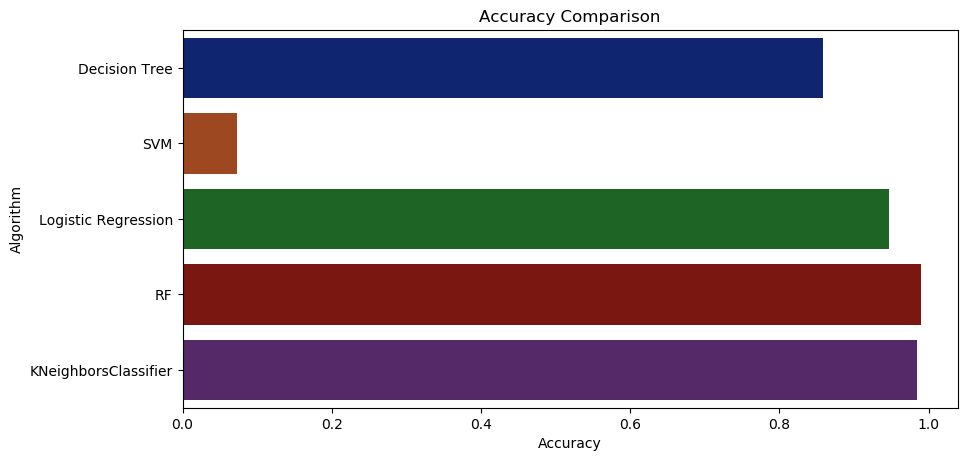

In [26]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Algorithm')
sns.barplot(x = acc,y = model,palette='dark')

## Given input a test data from the user, our model will predict the type of crop

In [27]:
data = np.array([[90,42, 43, 20.87974371, 82.00274423, 6.502985292, 202.9355362]])
prediction = RF.predict(data)
print(prediction)

['rice']


In [28]:
a=str(prediction)
res=''
for i in a:
    if(i>='a' and i<='z'):
        res=res+i
res=res.capitalize()
print(res)

Rice


In [31]:
import pickle
pickle.dump(RF, open('finalmodelnewcolumn.pkl','wb'))